# Рубежный контроль 1
## Грачева Анастасия ИУ5-62Б

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [28]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [19]:
# Первые 5 строк датасета
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
data.shape

(500, 9)

In [21]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 500


In [22]:
# Список колонок
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [23]:
# Список колонок с типами данных
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [24]:
# Проверим наличие пустых значений
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [49]:
#искуственно создадим пустые значения
df_with_missing = data.mask(np.random.random(data.shape) < 0.02)

In [50]:
for col in df_with_missing.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df_with_missing[df_with_missing[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 10
GRE Score - 16
TOEFL Score - 11
University Rating - 10
SOP - 14
LOR  - 8
CGPA - 9
Research - 13
Chance of Admit  - 5


In [51]:
#удалим пустые значения
cleaned_df = df_with_missing.dropna()

In [52]:
for col in cleaned_df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = cleaned_df[cleaned_df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
total_count = cleaned_df.shape[0]
print('Всего строк: {}'.format(total_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0
Всего строк: 412


In [62]:
# Определим уникальные значения для целевого признака
cleaned_df['Chance of Admit '].unique()

array([0.92, 0.76, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52, 0.84,
       0.78, 0.62, 0.61, 0.54, 0.64, 0.7 , 0.94, 0.44, 0.46, 0.74, 0.91,
       0.88, 0.58, 0.48, 0.49, 0.53, 0.87, 0.86, 0.89, 0.82, 0.72, 0.36,
       0.47, 0.56, 0.55, 0.57, 0.96, 0.93, 0.66, 0.38, 0.34, 0.42, 0.71,
       0.69, 0.59, 0.77, 0.79, 0.97, 0.81, 0.83, 0.67, 0.85, 0.73, 0.63,
       0.95, 0.6 , 0.43, 0.51, 0.39, 0.37])

C:\Users\User\AppData\Local\Temp\ipykernel_7832\3982136630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

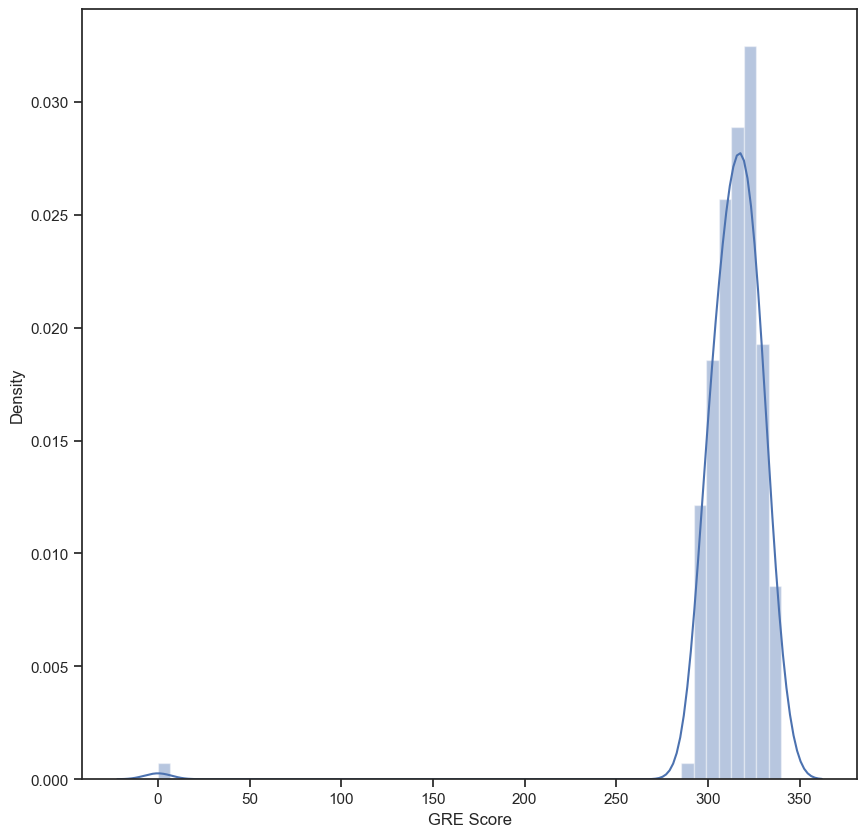

In [58]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(cleaned_df['GRE Score'])

In [71]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.006107,-0.080779,-0.050453,-0.121763,0.007345,-0.010950,-0.007654,0.011117
GRE Score,-0.006107,1.000000,0.166203,0.241324,0.240145,0.187025,0.232214,0.278997,0.340165
TOEFL Score,-0.080779,0.166203,1.000000,0.350678,0.305499,0.267540,0.263817,0.182529,0.388136
University Rating,-0.050453,0.241324,0.350678,1.000000,0.682001,0.583643,0.449016,0.427667,0.684541
SOP,-0.121763,0.240145,0.305499,0.682001,1.000000,0.603244,0.465012,0.374075,0.661495
LOR,0.007345,0.187025,0.267540,0.583643,0.603244,1.000000,0.448351,0.357480,0.626420
CGPA,-0.010950,0.232214,0.263817,0.449016,0.465012,0.448351,1.000000,0.377689,0.596424
Research,-0.007654,0.278997,0.182529,0.427667,0.374075,0.357480,0.377689,1.000000,0.542232
Chance of Admit,0.011117,0.340165,0.388136,0.684541,0.661495,0.626420,0.596424,0.542232,1.000000


In [72]:
cleaned_df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.000704,-0.087031,-0.036638,-0.122412,0.016857,-0.014839,-0.027410,0.013140
GRE Score,-0.000704,1.000000,0.142377,0.199390,0.204961,0.159890,0.240557,0.261609,0.299301
TOEFL Score,-0.087031,0.142377,1.000000,0.313892,0.305779,0.258733,0.300933,0.199500,0.377961
University Rating,-0.036638,0.199390,0.313892,1.000000,0.655651,0.585426,0.523465,0.423346,0.664827
SOP,-0.122412,0.204961,0.305779,0.655651,1.000000,0.608965,0.530383,0.362208,0.645632
LOR,0.016857,0.159890,0.258733,0.585426,0.608965,1.000000,0.499578,0.356796,0.623574
CGPA,-0.014839,0.240557,0.300933,0.523465,0.530383,0.499578,1.000000,0.450538,0.688436
Research,-0.027410,0.261609,0.199500,0.423346,0.362208,0.356796,0.450538,1.000000,0.537007
Chance of Admit,0.013140,0.299301,0.377961,0.664827,0.645632,0.623574,0.688436,0.537007,1.000000


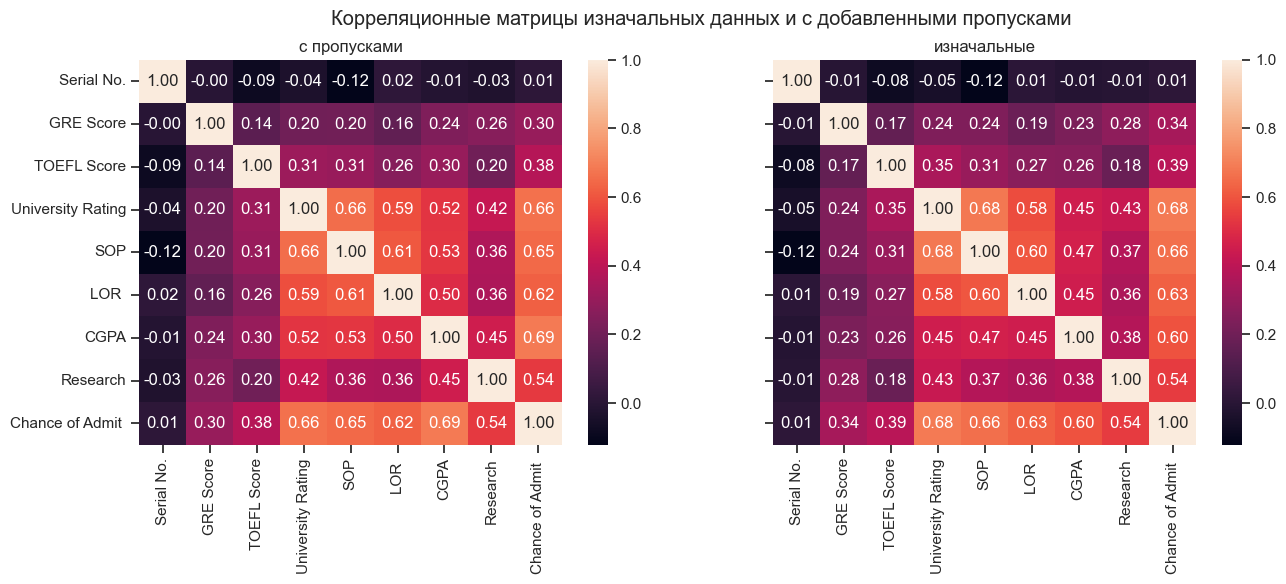

In [66]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(cleaned_df.corr(), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(), ax=ax[1], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы изначальных данных и с добавленными пропусками')
ax[0].title.set_text('с пропусками')
ax[1].title.set_text('изначальные')

Признаки University Rating, SOP, LOR, CGPA и Research имеют заметную положительную корреляцию с целевой переменной "Chance of Admit". Это означает, что они могут играть важную роль в предсказании шанса поступления студента. University Rating, SOP и LOR также имеют достаточно сильную корреляцию между собой, что может свидетельствовать об их взаимосвязи в контексте поступления в университет. Поскольку признаки имеют заметные корреляционные связи с целевой переменной "Chance of Admit", можно предположить, что построение моделей машинного обучения для прогнозирования шанса поступления будет обоснованным.